In [18]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import IPython
from IPython.display import HTML, display

pd.set_option('display.max_columns', None)

In [2]:
data_path = "https://www.statlearning.com/s/Advertising.csv"

df = pd.read_csv(data_path, index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


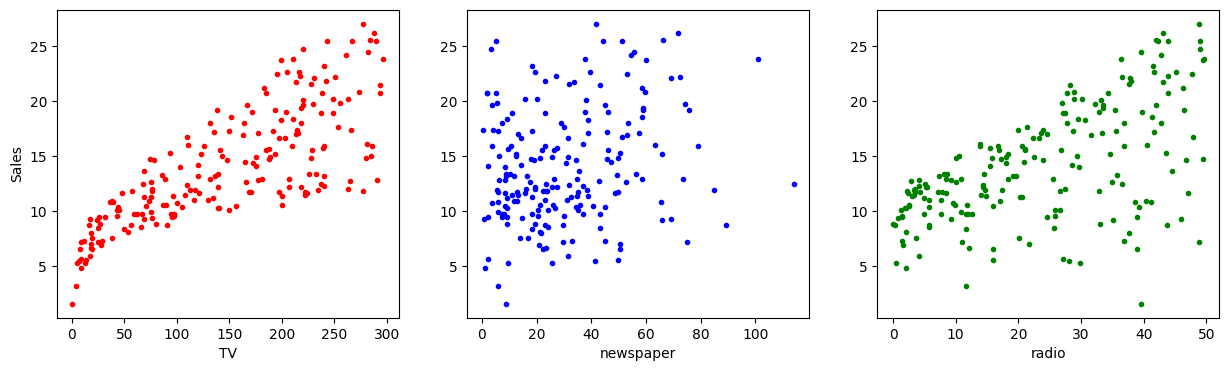

In [3]:
plt.figure(figsize=(15,4))
gs = plt.GridSpec(1,3)

# plot of sales vs TV
ax1 = plt.subplot(gs[0])
ax1.scatter(df['TV'], df['sales'], color='red', marker='.')
ax1.set_xlabel('TV')
ax1.set_ylabel('Sales')

# plot of sales vs newspaper
ax2 = plt.subplot(gs[1])
ax2.scatter(df['newspaper'], df['sales'], color='blue', marker='.')
ax2.set_xlabel('newspaper')


# plot of sales vs radio
ax3 = plt.subplot(gs[2])
ax3.scatter(df['radio'], df['sales'], color='green', marker='.')
ax3.set_xlabel('radio')

plt.show()

## Observation
The first plot shows a sharp upward trend in the number of units sold as TV advertising increases. Similar trends is observed in radio as advertising increases. However in the second plot, it doesn't show the realtionship between newspaper advertising and number if units sold.

## Multiple Linear Regression using Ordinary Least Squares

In [20]:
# Training LR using TV and Radio features
X = df[['TV', 'radio']]
y = df['sales']

#setting intercept/bias term to 1 for each sample
X = np.c_[np.ones((X.shape[0], 1)), X]
X_transpose = np.transpose(X)

# implementing least square solution of matrix form
betas = np.linalg.inv(X_transpose.dot(X)).dot(X_transpose).dot(y)


message = """<strong>TV and Radio</strong> <br>
$y$ = {:.2f} + {:.2f}$x_{{1}}$ + {:.2f}$x_{{2}}$ <br>
$x_{{1}}$ = TV <br>
$x_{{2}}$ = radio
""".format(betas[0], betas[1], betas[2])
display(HTML( message ))

print("")


# # Training Linear Regression using all features
X = df[["TV", "radio", "newspaper"]]
y = df[["sales"]]

# set bias/intercept  term to 1 for each 200 samples
X = np.c_[np.ones((X.shape[0], 1)), X]
X_transpose = np.transpose(X)


# implementing least square solution of matrix form
betas = np.linalg.inv(X_transpose.dot(X)).dot(X_transpose).dot(y)

message = """<strong>TV, Radio, and Newspaper</strong> <br>
$y$ = {:.2f} + {:.2f}$x_{{1}}$ + {:.2f}$x_{{2}}$ + {:.2f}$x_{{3}}$ <br>
$x_{{1}}$ = TV <br>
$x_{{2}}$ = radio <br>
$x_{{3}}$ = newspaper
""".format(*betas[0], *betas[1], *betas[2], *betas[3])
display(HTML( message ))



**TV, radio Vs. sales:**


Input variables are _TV_ ($x_1) and _radio_ ($x_2) and _sales_ is the output variable, $y$. We obtain a multiple linear regression model of $y = 2.92 + 0.05x_{1} + 0.19x_{2}$. Intercept, $\beta_0$ has been estimated as $2.92$ and two regression coefficients, $\beta_1$ and $\beta_2$ have been estimated to $0.05$ and $0.19$ respectively. The values of the parameters through OLS is same to that through `Scikit-Learn`.

**TV, radio, newspaper Vs. sales:**





_TV_ , _radio_ and _newspaper_are the input variables, $x_1, x_2 and x_3$ respectively and _sales_ is the output variable, $y$. We obtain a multiple linear regression model of $y = 2.94 + 0.05x_{1} + 0.19x_{2} + 0.00x_{3}$; note that each of the estimated model parameters (i.e., $\beta_{0}$ through $\beta_{3}$) have been rounded to 2 decimal places.. Intercept, $\beta_0$ has been estimated as $2.94$ and three regression coefficients, $\beta_1$, $\beta_2$ and $\beta_3$ have been estimated to $0.05$, $0.19$,  and $0.00$ respectively. The values of the parameters through OLS is same to that through `Scikit-Learn`.

# Potential Issues with Ordinary Least Squares
OLS tends to find the estimates of parameters such that the _Sum of Squares of Errors, SSE_ is minimum.

While deriving the solution, we had made few assumptions. Violation of these assumptions might create serious problems while finding the solution. Some of the assumptions with the potential issues after their violation are:



- Existence of $(\mathbf{X}^{T}\mathbf{X})^{-1}$

  While calculating $\beta$, we assume that $(\mathbf{X}^{T}\mathbf{X})^{-1}$ exists. When doesn't it exist?

  The inverse doesn't exist when the matrix, $\mathbf{X}^{T}\mathbf{X}$, is not a full rank matrix. The matrix $\mathbf{X}$ with dimension $n\times(d+1)$ should have at least $(d+1)$ linearly independent rows to make $\mathbf{X}^{T}\mathbf{X}$ a full rank matrix. If there is perfect colinearity between any two independent input variables, then the matrix doesn't become full rank and the issues arise. There should be correlation between dependent(output) and independent(input) variable but the independent variables should be independent of each other.

- Existence of $n>>d$

  If $n<d+1$, we can not do least squares. Numerous solution are obtained if the number of data points is less than the dimension of the features. So, we need more observations or samples than the number of features.

There is another parameter estimation method, _Gradient Descent_, which addresses the issues of Ordinary Least Squares.